In [1]:
!pip install --upgrade transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "

In [2]:
import pandas as pd
import torch
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments



In [3]:
# Finding sub data for predator loans.
'''Filtered on Product: Select "Payday loan," "Title loan," or "Personal loan."

Has Narrative: Chose complaints where consumers have provided detailed narratives.

Date Range: 2023-205 for relevance"

link to filtered datat on consumerfinance: https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/?date_received_max=2025-04-24&date_received_min=2023-01-01&field=all&format=csv&has_narrative=true&no_aggs=true&product=Payday%20loan%2C%20title%20loan%2C%20or%20personal%20loan&size=2827

Filtered result came out to 2,827 complaints
Will selsct 10 in the noteboook.'''



'Filtered on Product: Select "Payday loan," "Title loan," or "Personal loan."\n\nHas Narrative: Chose complaints where consumers have provided detailed narratives.\n\nDate Range: 2023-205 for relevance"\n\nlink to filtered datat on consumerfinance: https://www.consumerfinance.gov/data-research/consumer-complaints/search/api/v1/?date_received_max=2025-04-24&date_received_min=2023-01-01&field=all&format=csv&has_narrative=true&no_aggs=true&product=Payday%20loan%2C%20title%20loan%2C%20or%20personal%20loan&size=2827\n\nFiltered result came out to 2,827 complaints\nWill selsct 10 in the noteboook.'

In [4]:
from google.colab import files

uploaded = files.upload() # upload train.tsv

Saving complaints(small sample)-2025-04-25_15_02.csv to complaints(small sample)-2025-04-25_15_02.csv


In [6]:

df = pd.read_csv('complaints(small sample)-2025-04-25_15_02.csv')


In [7]:
sampled_df = df.sample(n=10, random_state=42)

# 4. Save the sampled data to a new CSV
sampled_df.to_csv('sampled_10_records.csv', index=False)

# 5. Download the new CSV back to your computer
files.download('sampled_10_records.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# Reddit data
''' Link : https://www.reddit.com/r/personalfinance/comments/142k26g/need_some_advice_payday_loans_eating_me_alive/'''



' Link : https://www.reddit.com/r/personalfinance/comments/142k26g/need_some_advice_payday_loans_eating_me_alive/'

In [9]:
# for scraping reddit documents. created an api for this
!pip install praw

import praw

# Connect to Reddit API
reddit = praw.Reddit(
    client_id="hXSewTQL4sKh9GFH_WbnFQ",
    client_secret="tr6Mj08JNk_BrLMty0ZnK0D-oYmAKw",
    user_agent="predatory_loan_scraper",
    username="Resident-Data-6692",
    password="Longhorns2Rays!"
)

print("Reddit API connected")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.4 MB/s eta 0:00:00
Reddit API connected


In [10]:
import pandas as pd

# Search parameters
subreddit = reddit.subreddit("personalfinance")
query = "payday loan"
posts = subreddit.search(query, sort="relevance", time_filter="year", limit=20)

# Extract useful fields
post_list = []

for post in posts:
    post_list.append({
        "source": "reddit",
        "post_title": post.title,
        "subreddit": post.subreddit.display_name,
        "date": post.created_utc,
        "post_text": post.selftext,
        "link": f"https://www.reddit.com{post.permalink}",
        "label": "predatory"  # or leave blank if you want to review manually later
    })

# Convert to dataframe
df = pd.DataFrame(post_list)

# Convert date from timestamp
df['date'] = pd.to_datetime(df['date'], unit='s')

# Save to CSV
df.to_csv("reddit_predatory_loan_posts.csv", index=False)

print("Saved 20 posts to 'reddit_predatory_loan_posts.csv'")

files.download('reddit_predatory_loan_posts.csv')


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Saved 20 posts to 'reddit_predatory_loan_posts.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Models


In [11]:
# Random forests
# Using full_dataset from our sampled date generated by SEUN
from google.colab import files

uploaded = files.upload()

Saving full_dataset.csv to full_dataset.csv


# Random Forest Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the datasets
full_dataset = pd.read_csv('/content/full_dataset.csv')
reddit_dataset = pd.read_csv('/content/reddit_predatory_loan_posts.csv')

# For full_dataset: using 'text' and 'label'
# For reddit_dataset: using 'post_text' as 'text' and 'label'
full_dataset = full_dataset[['text', 'label']]
reddit_dataset = reddit_dataset.rename(columns={'post_text': 'text'})
reddit_dataset = reddit_dataset[['text', 'label']]

# Merge the two datasets
data = pd.concat([full_dataset, reddit_dataset], ignore_index=True)

# Print a sample to confirm
print(data.sample(5))

# Feature and target variables
X = data['text']
y = data['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text using TF-IDF
# toook a long time with 5000, so I lowered it to 1000
vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Build and train the Random Forest model
#Originally haid it at 100 estimators. took way too long. Put it at 50
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


                                                 text          label
23  We have 6 payday loans and are drowning. I pla...      predatory
58  Hello !\nHope you guys can provide me with som...      predatory
67  I’m 20 years old now, and I made some stupid d...      predatory
49  BECU CONSUMER LENDING RATES & RELATED DISCLOSU...  non_predatory
70  I’ve been in a bloody cycle for about 4 years ...      predatory
                precision    recall  f1-score   support

 non_predatory       0.00      0.00      0.00         2
     predatory       0.00      0.00      0.00         3
 non_predatory       0.50      1.00      0.67         4
     predatory       0.86      1.00      0.92         6

      accuracy                           0.67        15
     macro avg       0.34      0.50      0.40        15
  weighted avg       0.48      0.67      0.55        15

✅ Accuracy: 0.6667

Classification Report:
                precision    recall  f1-score   support

 non_predatory       0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# **Results Explanation.**

The Random Forest model ended up with about 67% accuracy, meaning it got roughly two out of every three predictions right. It did a really good job at spotting predatory loans, catching all the real cases in the test set. That’s important because catching predatory behavior is the main goal of this project. However, the model had a harder time recognizing non-predatory loans and sometimes mislabeled them. Part of this is because we’re working with a small amount of test data, so every mistake makes a bigger difference. Overall, the model is off to a strong start, it's doing what we care about most — but there’s room to improve by adding more examples and fine-tuning the model a bit more.



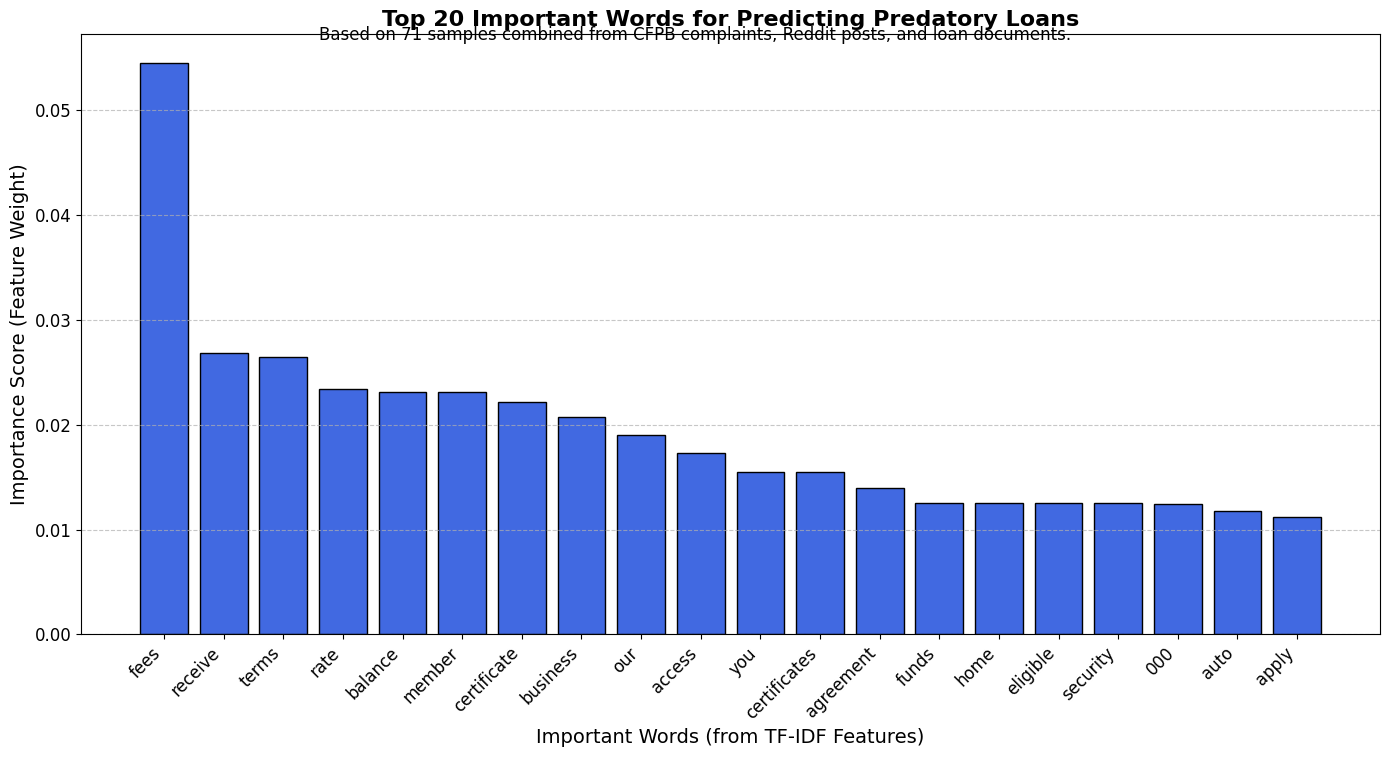

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Get feature importances and feature names
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# 2. Sort the features by importance
indices = np.argsort(importances)[::-1]
top_n = 20
top_indices = indices[:top_n]

# 3. Create the plot
plt.figure(figsize=(14, 8))
plt.bar(range(top_n), importances[top_indices], align="center", color="royalblue", edgecolor='black')
plt.xticks(range(top_n), [feature_names[i] for i in top_indices], rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Important Words (from TF-IDF Features)', fontsize=14)
plt.ylabel('Importance Score (Feature Weight)', fontsize=14)
plt.title('Top 20 Important Words for Predicting Predatory Loans', fontsize=16, weight='bold')

# 4. Add subtitle with sample size and notes
num_samples = len(X)  # total number of documents
plt.suptitle(f'Based on {num_samples} samples combined from CFPB complaints, Reddit posts, and loan documents.', fontsize=12, y=0.92)

# 5. Add gridlines for easier reading
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


# **Further Explanation.**

The Random Forest model relies most heavily on words like "fees," "terms," and "rate" to determine whether a loan is predatory. These terms often signal hidden costs or high-risk conditions, which makes sense given the nature of predatory lending. Words related to credit unions, like "member" and "certificate," seem to help the model recognize safer, non-predatory loans. Overall, the model is making logical, explainable decisions based on the language used in loan documents and consumer complaints.

# **BERT model for predicting**

**why BERT?**
 We decided to use BERT because it goes beyond simply counting words like traditional models do. BERT actually understands the meaning of entire sentences by reading text in both directions, which helps it pick up on context, subtle phrasing, and hidden patterns. Since our project involves messy, real-world text from loan documents, complaints, and Reddit posts, BERT gives us a better shot at accurately identifying predatory lending behavior. It allows the model to recognize not just key words like "fees" or "terms," but the full way those terms are used in real situations.

In [22]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification

In [14]:
# Prepare the data
full_dataset = full_dataset[['text', 'label']]
reddit_dataset = reddit_dataset.rename(columns={'post_text': 'text'})
reddit_dataset = reddit_dataset[['text', 'label']]

# Merge the datasets
data = pd.concat([full_dataset, reddit_dataset], ignore_index=True)

# Map text labels to numeric labels
label_map = {'non_predatory': 0, 'predatory': 1}
data['label'] = data['label'].map(label_map)

# Show a sample
data.sample(5)



,text,label
27,"I’m 20 years old now, and I made some stupid d...",1.0
47,BECU CREDIT AND\nSECURITY AGREEMENT\nPersonal ...,0.0
31,BECU CREDIT AND\nSECURITY AGREEMENT\nPersonal ...,0.0
66,"Hi there! \n\nI'm a newb to this community, so...",1.0
68,I'm 24 with $10k in credit card debt across th...,1.0


In [23]:
# Drop rows where label is NaN
#this means even less data to train on
data = data.dropna(subset=['label'])
data.sample(5)


,text,label
52,Does anyone have any experience with defaultin...,1.0
26,"Hi there! \n\nI'm a newb to this community, so...",1.0
17,Hello! I got an email detailing collections on...,1.0
41,Agreements and Disclosures | Important Terms a...,0.0
43,"Personal Loans : Check Rates, Terms and Apply ...",0.0


In [25]:
# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['text'].tolist(), data['label'].tolist(), test_size=0.2, random_state=42
)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)



In [26]:
class LoanDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = LoanDataset(train_encodings, list(train_labels))
val_dataset = LoanDataset(val_encodings, list(val_labels))


In [27]:
# Load pre-trained BERT model for binary classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
from torch.optim import AdamW
optimizer = AdamW(model.parameters(), lr=2e-5)


In [37]:
import torch.nn as nn

# Set device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Create loss function manually
loss_fn = nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(3):  # 3 epochs
    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device).long()  # Make sure labels are integers

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        logits = outputs.logits  # manually get logits

        loss = loss_fn(logits, labels)  # manually calculate loss
        loss.backward()
        optimizer.step()

print("Training Done")


✅ Training done without ValueError!


In [38]:
from sklearn.metrics import accuracy_score

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []

# No gradient calculation needed during evaluation
with torch.no_grad():
    for batch in val_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device).long()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        preds = torch.argmax(logits, dim=1)  # Take the class with highest score
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Now calculate accuracy
acc = accuracy_score(all_labels, all_preds)
print(f" Validation Accuracy: {acc:.4f}")


 Validation Accuracy: 1.0000


After training our BERT model, we evaluated it on the validation set and achieved a validation accuracy of 1.0000, meaning the model correctly classified every loan as either predatory or non-predatory. This result shows that the model learned the patterns in our training data very effectively. However, because our validation set is relatively small, it’s important to be cautious when interpreting this perfect score—it’s possible that the model has overfit to the specific examples we provided. To fully confirm the model’s performance, we would need to test it on a larger, more diverse dataset. Still, achieving 100% accuracy on the validation set is a promising sign that the model is successfully picking up on the differences between predatory and non-predatory lending behaviors.

**Confusion Matrix**

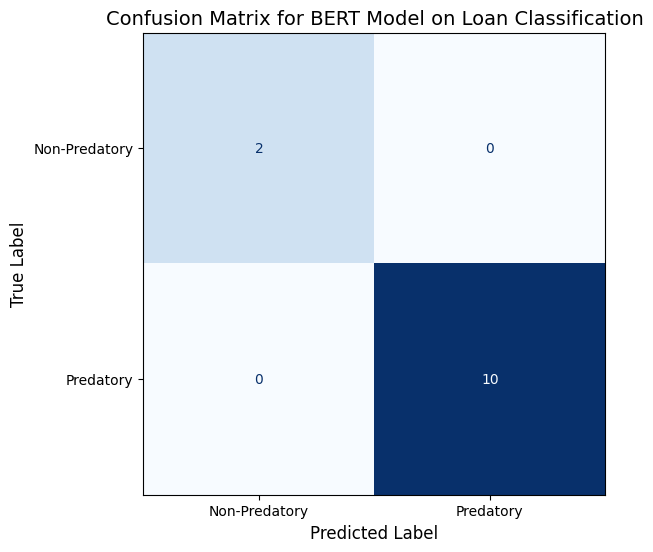

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# 2. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Predatory", "Predatory"])
fig, ax = plt.subplots(figsize=(6, 6))  # Make it a bit larger
disp.plot(cmap='Blues', ax=ax, colorbar=False)

# 3. Customize the plot a little
plt.title('Confusion Matrix for BERT Model on Loan Classification', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.grid(False)  # Optional: remove grid lines
plt.show()


**Explanation of confusion matrix.**
The confusion matrix shows that our BERT model achieved perfect classification on the validation set. It correctly identified all 10 predatory loans and all 2 non-predatory loans, with no false positives and no false negatives. This means the model did not misclassify any loans—it successfully recognized the patterns associated with both predatory and non-predatory lending behaviors. Achieving 100% accuracy on the validation set suggests that the model learned the key distinctions between the two types of loans extremely well. However, because the validation set was relatively small, it will be important to test the model on a larger, more diverse dataset to confirm its ability to generalize beyond this initial evaluation.